In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/home/jeremy/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
reddit_df = pd.read_csv('/home/jeremy/Teaching/intro_to_programming_and_ds/resources/data/100k_random_reddit_2018.csv')

In [20]:
df_by_length = reddit_df.sort_values('comment_length', ascending=False)
df_by_length.head()

,created_utc,subreddit,author,comment_length,score
21207,1522288057,LoveNikki,queerestqueen,10045,6
52329,1532344433,Music,DJ_Spam,9726,1
78315,1540314439,NewsBrasil,newsbrasilbot,9720,1
61600,1535240874,NFLstream4kHD,Illustrious_Play,9577,1
71908,1538405283,Music,DJ_Spam,9418,2


### Exercise 1

Sort the data frame by score and select the rows with the 10th to 20th highest scores.


In [25]:
## Your code here
df_by_score = reddit_df.sort_values('score', ascending=False)

df_by_score.iloc[9:20,]


,created_utc,subreddit,author,comment_length,score
63126,1535693715,madlads,craggolly,80,4827
73188,1538758397,AskReddit,Ankoku_Teion,127,4675
79165,1540552716,gaming,testawayacct,137,4666
1963,1515542877,StarWars,TLM86,162,3959
23011,1522931043,AskReddit,JelloVV,189,3789
64345,1536078182,therewasanattempt,OfficialAlectPrasad,120,3778
88861,1543329669,fo76,honorelove,42,3718
8514,1517871679,videos,Zackmorristhecat,84,3663
77395,1540038919,videos,radioheady,70,3564
96618,1545408372,TwoXChromosomes,Pr2r,303,3562


### Exercise 2

Now, how would you select just the `subreddit` and `comment_length` columns for the rows you selected above?

In [26]:
## Your code here
df_by_score.iloc[9:20, [1,3]]

,subreddit,comment_length
63126,madlads,80
73188,AskReddit,127
79165,gaming,137
1963,StarWars,162
23011,AskReddit,189
64345,therewasanattempt,120
88861,fo76,42
8514,videos,84
77395,videos,70
96618,TwoXChromosomes,303


In [35]:
df_by_score.iloc[9:20,].loc[:,["comment_length","score", "subreddit"]]

,comment_length,score,subreddit
63126,80,4827,madlads
73188,127,4675,AskReddit
79165,137,4666,gaming
1963,162,3959,StarWars
23011,189,3789,AskReddit
64345,120,3778,therewasanattempt
88861,42,3718,fo76
8514,84,3663,videos
77395,70,3564,videos
96618,303,3562,TwoXChromosomes


### Exercise 3

Find the average (mean) comment length for each subreddit and sort by comment length

In [36]:
## Your code here

reddit_df.groupby('subreddit').comment_length.mean().sort_values()

subreddit
AskTheOuija                1.0
Boilermakers               1.0
im30andthisissheep         1.0
askOuiji                   1.0
FalconsBuccaneerlive       1.0
                         ...  
EnglishOneThirtyOne     6054.0
TheTruthTellers         6214.0
DestructiveReaders      7532.0
NFLstream4kHD           9577.0
NewsBrasil              9720.0
Name: comment_length, Length: 10198, dtype: float64

### Exercise 4

Plot the number of comments and average score. Are frequent posters more likely to share comments that are well-received?

*Hint*: You will want to use a dataframe that groups the data by person

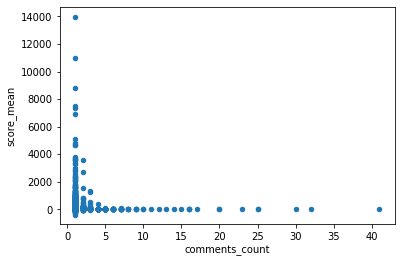

In [43]:
## Your code here
grouped_df = reddit_df.groupby('author')

comments_count = grouped_df.size()
score_mean = grouped_df.score.mean()


person_df = pd.DataFrame({'comments_count': comments_count,
                          'score_mean': score_mean})

person_df = person_df.loc[person_df.comments_count < 50]

person_df.plot.scatter(x = 'comments_count', y = 'score_mean')


In [45]:
reddit_df.index = pd.to_datetime(reddit_df.created_utc, unit='s', utc=True)
reddit_df.head()

,created_utc,subreddit,author,comment_length,score
created_utc,,,,,
2018-01-01 00:00:41+00:00,1514764841,Astronomy,illuminatiisnowhere,50,3
2018-01-01 00:02:52+00:00,1514764972,politics,ExtracurricularSpork,31,10
2018-01-01 00:03:37+00:00,1514765017,frugalmalefashion,TheBarnhouseEffect,126,5
2018-01-01 00:06:57+00:00,1514765217,KansasCityChiefs,thenewguyreddit,48,5
2018-01-01 00:09:20+00:00,1514765360,Aeon,ribnag,385,1


In [46]:
reddit_df['num_comments'] = 1

### Exercise 5

Plot the number of comments per month over the year.

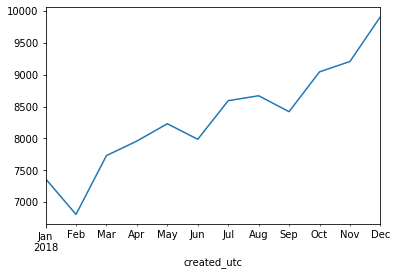

In [57]:
# Your code here
monthly_comments = reddit_df.resample('M').num_comments.sum()
monthly_comments.plot()

### Exercise 6

See if you can figure out how to change the above plot so that instead of showing one overall line for comments per hour, it shows a line for each day of the week (e.g., a line for comments per hour on Mondays, another for Tuesdays, etc.).

This code can help you to get started: it sums the number of comments by hour and day.

week_day
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
Name: comments, dtype: object

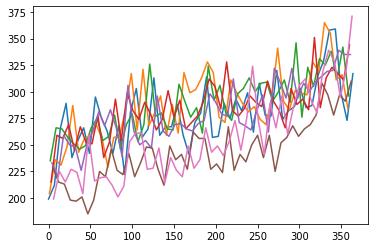

In [58]:
#reddit_df.groupby([reddit_df.index.hour, reddit_df.index.weekday]).num_comments.sum()

from pandas import DataFrame
daily_comments = reddit_df.resample('D').num_comments.sum()
day_graph = list()
day_week = 1
for day in daily_comments:
    day_graph.append((day_week,day))
    day_week += 1
    if(day_week > 7):
        day_week = 1
day_df = DataFrame (day_graph, columns = ['week_day', 'comments'])
day_df.groupby('week_day').comments.plot()

In [63]:
reddit_df.index.hour

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='created_utc', length=99910)

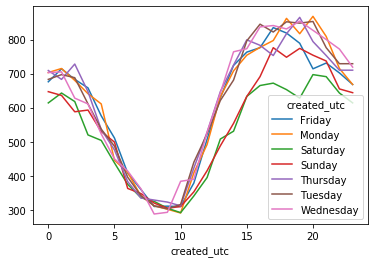

In [72]:
reddit_df.groupby([reddit_df.index.hour, reddit_df.index.day_name()]).size().unstack().plot()